C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


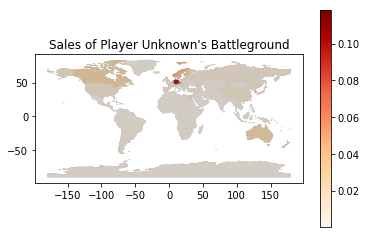

In [2]:
%matplotlib inline
import pandas as pd
import os

path="C:\\Program Files (x86)\Python36-32"
df=pd.read_csv(path+'/country_iso_code/STEAM_country.csv')
country_path=path+'/country_clean/raw/'

cont=[]
contfull=[]
for con in os.listdir(country_path):
    if con !='.DS_Store':
        cont.append(con[:2])
        name=df["official_name_en"].loc[df["ISO3166-1-Alpha-2"].str.contains(con[:2].upper())==True]
        contfull.extend(name)

populs=[]
temp=pd.read_csv(path+"/country.csv")
for i in range(len(cont)):
    populs.extend(temp["Population"].loc[temp["Country Name"]==contfull[i]])
        
ppps=[]
temp=pd.read_csv(path+"/ppp.csv")
for i in range(len(cont)):
    ppps.extend(temp["PPP"].loc[temp["Country Name"]==contfull[i]].astype(float))
    
popul=dict(zip(cont,populs))
ppp=dict(zip(cont,ppps))
iso3=[]
sales=[]
sales_cs=[]
sales_pubg=[]
sales_l4d=[]
sales_cod=[]
sales_fm=[]
sales_gta=[]
prices_cs=[]
prices_pubg=[]
prices_l4d=[]
prices_cod=[]
prices_fm=[]
prices_gta=[]
for country in cont:
    iso3.extend(df['ISO3166-1-Alpha-3'].loc[df["ISO3166-1-Alpha-2"].str.lower()==country])
    sales_year_cs=0
    sales_year_pubg=0
    sales_year_l4d=0
    sales_year_cod=0
    sales_year_fm=0
    sales_year_gta=0
    frame=pd.read_csv(path+"/country_clean/country_appid/"+country+".csv")
    sales_year_cs=frame["sales_q"].loc[frame["name"]=="Counter-Strike: Global Offensive"]
    sales_year_pubg=frame["sales_q"].loc[frame["name"]=="PLAYERUNKNOWN'S BATTLEGROUNDS"]
    sales_year_l4d=frame["sales_q"].loc[frame["name"]=="Left 4 Dead 2"]
    sales_year_cod=frame["sales_q"].loc[frame["name"]=="Call of Duty: Modern Warfare 2"]
    sales_year_fm=frame["sales_q"].loc[frame["name"]=="Football Manager 2016"]
    sales_year_gta=frame["sales_q"].loc[frame["name"]=="Grand Theft Auto V"]
    prices_cs.extend(frame["local_price_usd"].loc[frame["name"]=="Counter-Strike: Global Offensive"]/ppp[country])
    prices_pubg.extend(frame["local_price_usd"].loc[frame["name"]=="PLAYERUNKNOWN'S BATTLEGROUNDS"]/ppp[country])
    prices_l4d.extend(frame["local_price_usd"].loc[frame["name"]=="Left 4 Dead 2"]/ppp[country])
    prices_cod.extend(frame["local_price_usd"].loc[frame["name"]=="Call of Duty: Modern Warfare 2"]/ppp[country])
    prices_fm.extend(frame["local_price_usd"].loc[frame["name"]=="Football Manager 2016"]/ppp[country])
    prices_gta.extend(frame["local_price_usd"].loc[frame["name"]=="Grand Theft Auto V"]/ppp[country])
    sales_cs.extend(sales_year_cs/popul[country])
    sales_pubg.extend(sales_year_pubg/popul[country])
    sales_l4d.extend(sales_year_l4d/popul[country])
    sales_cod.extend(sales_year_cod/popul[country])
    sales_fm.extend(sales_year_fm/popul[country])
    sales_gta.extend(sales_year_gta/popul[country])

import numpy as np
import json
import requests
import matplotlib.colors as colors
from numpy import random
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib 
from mpl_toolkits.axes_grid1 import AxesGrid

class MidpointNormalize(colors.Normalize):
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
graph_cs=pd.DataFrame({"iso_a3":iso3,"country":cont,"sales_pubg":sales_pubg})
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.join(graph_cs.set_index('iso_a3'), on='iso_a3')
world = pd.merge(world, graph_cs, left_on='iso_a3', right_on='iso_a3',how='outer')
ax = world.plot(color="dimgrey")
world.plot(ax=ax, column="sales_pubg", cmap='OrRd',scheme=None,alpha =0.7,legend = True)
ax.set_title("Sales of Player Unknown's Battleground")
plt.show()

